In [1]:
import numpy as np
import pandas as pd

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt

#from sklearn.datasets import fetch_kddcup99
#from yellowbrick.cluster import KElbowVisualizer

In [2]:
data = pd.read_csv('https://cloud.hrun.duckdns.org/s/D4Lxeo4oPg3MmyH/download/kddcup99.csv')

In [3]:
data.describe()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,lnum_compromised,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,494020.000000,4.940200e+05,4.940200e+05,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,...,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000,494020.000000
mean,47.979400,3.025616e+03,8.685308e+02,0.000045,0.006433,0.000014,0.034519,0.000152,0.148245,0.010212,...,232.471248,188.666052,0.753781,0.030906,0.601936,0.006684,0.176754,0.176443,0.058118,0.057412
std,707.747185,9.882191e+05,3.304003e+04,0.006673,0.134805,0.005510,0.782103,0.015520,0.355343,1.798328,...,64.744601,106.040205,0.410780,0.109259,0.481309,0.042133,0.380593,0.380920,0.230590,0.230141
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,46.000000,0.410000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.200000e+02,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.032000e+03,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.040000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,58329.000000,6.933756e+08,5.155468e+06,1.000000,3.000000,3.000000,30.000000,5.000000,1.000000,884.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
Y = data.iloc[:,-1] 
X = data.iloc[:,:-1]

# Categorical features
cat_features = ['protocol_type', 'service', 'flag']

# One-Hot-Encoding 
encoder = OneHotEncoder(sparse_output=False)
X_encoded = encoder.fit_transform(X[cat_features])

new_feature_names = encoder.get_feature_names_out(input_features=cat_features)

# Add the encoded array to the data and assign the new column names
X_encoded_df = pd.DataFrame(X_encoded, columns=new_feature_names)
X = pd.concat([X.drop(columns=cat_features), X_encoded_df], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

print(len(X_train))

395216


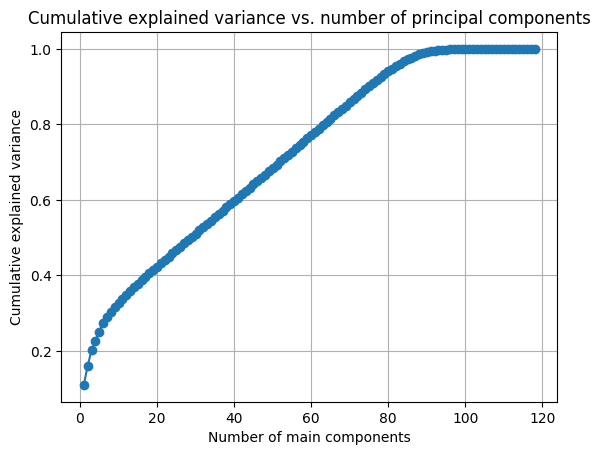

Optimal number of main components: 75
[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 29, 30, 31, 32, 33, 34, 35, 36, 37, 39, 40, 41, 42, 43, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 56, 57, 58, 59, 60, 61, 62, 63, 65, 66, 68, 70, 71, 72, 73, 74]


In [9]:
# Scaling the data 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_train)

pca = PCA()
pca.fit(X_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance = np.cumsum(explained_variance_ratio)

plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o')
plt.xlabel('Number of main components')
plt.ylabel('Cumulative explained variance')
plt.title('Cumulative explained variance vs. number of principal components')
plt.grid(True)
plt.show()

threshold = 0.90
n_components = np.argmax(cumulative_variance >= threshold) + 1

print(f'Optimal number of main components: {n_components}')

pca = PCA(n_components=n_components)  # Wählen Sie die Anzahl der gewünschten Hauptkomponenten
X_pca = pca.fit_transform(X_scaled)

# Abrufen der Gewichtungen der ursprünglichen Features in den Hauptkomponenten
feature_weights = pca.components_

# Skalieren der Gewichte
scaled_weights = feature_weights.T * np.sqrt(pca.explained_variance_)


# Identifizieren der relevanten Features für jede Hauptkomponente
relevant_features = [] 
index_selected_features = [] 
for i, weights in enumerate(scaled_weights):
    component_features = []
    for j, weight in enumerate(weights):
        if abs(weight) > 0.4:  # Schwellenwert zur Bestimmung der Relevanz festlegen
            component_features.append(j)  # Index des Features hinzufügen
    relevant_features.append(component_features)

# Ausgabe der relevanten Features für jede Hauptkomponente
for i, component_features in enumerate(relevant_features):
    for feature_index in component_features:
        index_selected_features.append(feature_index)

# Selectierung anhand der relevanten Features für jede Hauptkomponente
index_selected_features = list(set(index_selected_features))
X_scaled = X_train.iloc[:, index_selected_features]  
#print(index_selected_features)

In [10]:

# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(4,12),  timings=False)

visualizer.fit(X_train)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure


NameError: name 'KElbowVisualizer' is not defined

In [7]:
k = 6
kmeans = KMeans(n_clusters=k)
kmeans.fit(X_train)

# Berechnung der Distanzen der Datenpunkte zu ihren Zentren
distances = kmeans.transform(X_train)

# Ausgabe der identifizierten Ausreißer
# print("distances:")
# for distance in distances:
#     print(distance)

# Index der Clusterzentren, zu denen die Punkte gehören
cluster_indices = kmeans.labels_

print(kmeans.labels_)

# Setzen der Werte auf Null für Nicht-Cluster-Datenpunkte
mask = (cluster_indices[:, None] == np.arange(distances.shape[1]))
distances[~mask] = 0

# Berechnung des Durchschnitts der Entfernungen für jedes Clusterzentrum  
dictionary = {i: column for i, column in enumerate(zip(*distances))}


# Mittelwerte über jeden Eintrag berechnen
mean_distances = [sum(values) / len(values) for key, values in dictionary.items()]
thresholds = np.array(mean_distances)  # thresholds als NumPy-Array anpassen

    
outliers = np.any(np.array(distances) > thresholds, axis=1)  # Überprüfung der Bedingung für jedes Element in distances


    
    


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 0 ... 0 0 0]


In [8]:
filtered_outlier = y_train[outliers]


filtered_labels = filtered_outlier[filtered_outlier != 'normal']





count = (len(filtered_labels) *100) /len(filtered_outlier)

print(count)


7.953661277772975


In [9]:
# Beispiel-Distanzenmatrix
distances = np.array([[0.5, 0.8, 1.2],
                      [1.0, 0.7, 0.9],
                      [1.5, 1.2, 0.6]])

# Beispiel-Vektor mit Einsen und Nullen
vector = np.array([1, 0, 1])



# for index,  column in enumerate(distances.T):
#     for v in range(len(column)):
#                 if vector[v] != index:
#                         distances[v][index] = 0
                    

                    




In [10]:
#Auswtungd label
# beobahtde  distanze funktion auf featerues 1 3 6 12 15